# Visualise the data (dynamics, moments, WCF)

In this file we will plot the system dynamics, work moments, and the WCF. There will be no convergence tests in this file, which will be saved for "convergence_tests.ipynb"

In [37]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def plot_dynamics(a, tp, dt, p):
    """
    Plot the dynamics of the system based on the provided parameters.
    """
    
    fig, axs = plt.subplots(2, 3, figsize=(14, 6))
    
    for sta in [0, 1]:
        filename = f'data/dynamics-files/dyns-a{a}_G10.0_w25.0_e25.0_tp{tp}_sta{sta}_dt{dt}_p{p}.csv'
        df = pd.read_csv(filename)
        
        # first row
        axs[0, 0].plot(df['tlist'], df['tr'], label=f'trace (sta={sta})')
        axs[0, 1].plot(df['tlist'], df['mag'], label=f'magnetization (sta={sta})')
        axs[0, 2].plot(df['tlist'], df['coh'], label=f'coherence (sta={sta})')
        # second row
        axs[1, 0].plot(df['tlist'], df['energy'], label=f'energy (sta={sta})')
        axs[1, 1].plot(df['tlist'], df['overlap_target'], label=f'overlap target (sta={sta})')
        axs[1, 2].plot(df['tlist'], df['overlap_instant'], label=f'overlap instant (sta={sta})')

    # formatting
    for ax in axs.flat:
        ax.set_xlabel('Time')
        ax.legend()
        ax.grid(alpha=0.2)
    
    plt.tight_layout()
    return


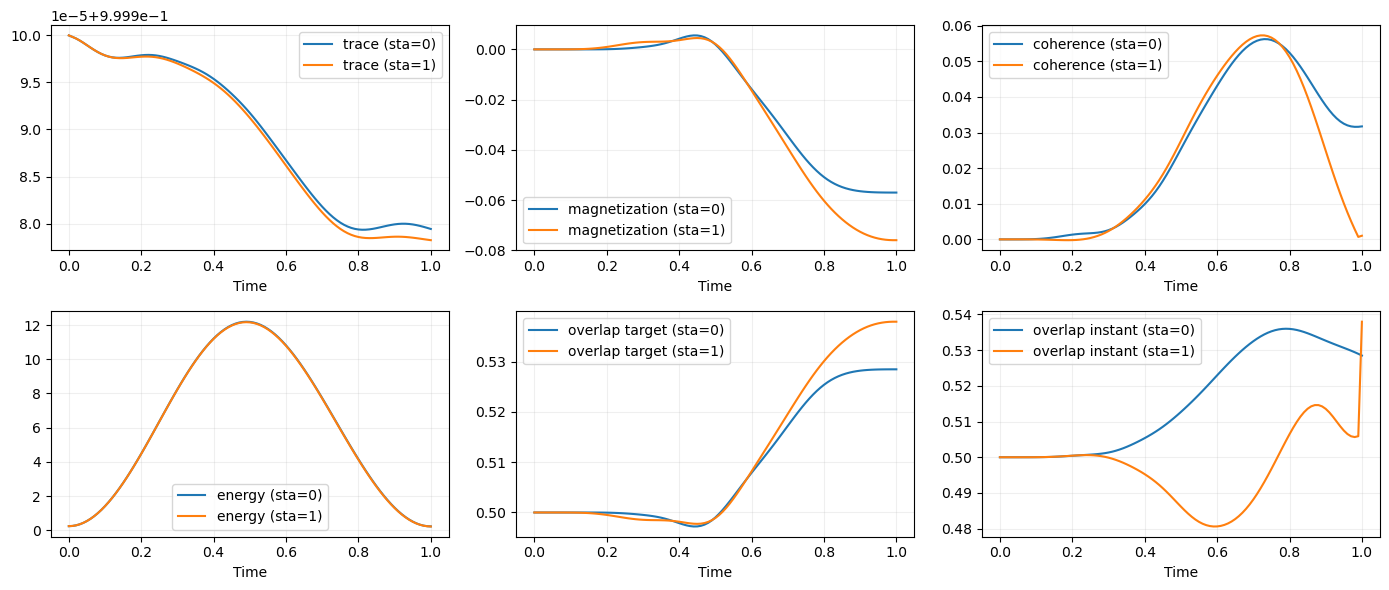

In [44]:
# test load:
alpha = 0.02
tp = 1.0
sta = 1
dt = 0.01
p = 7.0
plot_dynamics(alpha, tp, dt, p)

In [45]:
# TODO plot moments - do we want to have moments calculated for all times during the protocol? If so, moments.py needs to be modified.

In [46]:
#

# Plot the work characteristic function

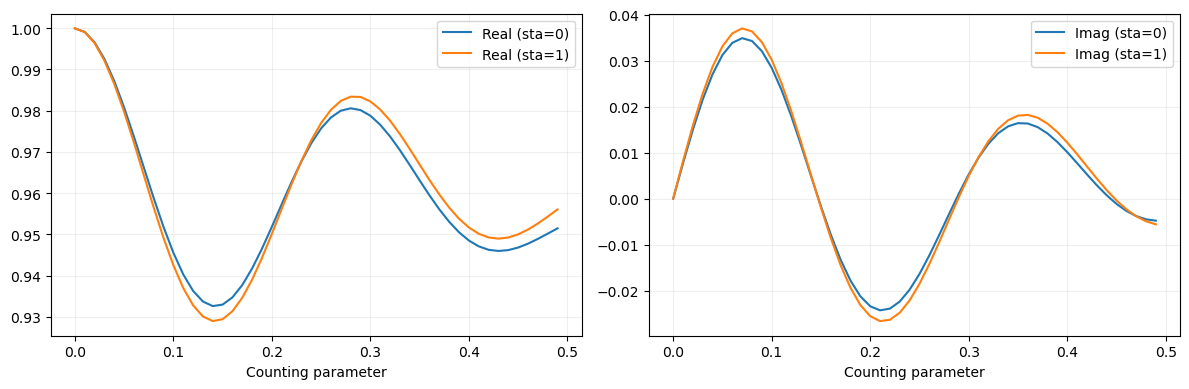

In [50]:
def plot_wcf(alpha, tp, dt, p, S, X0, Xf):
    """
    Plot the WCF (Work Correlation Function) based on the provided parameters.
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    for sta in [0, 1]:
        df = pd.read_csv(f'data/wcf-files-combined/WCF_a{alpha}_G10.0_w25.0_e25.0_t{tp}_sta{sta}_dt{dt}_p{p}_eq{S}_X{X0}_Xf{Xf}.txt', sep='\t', header=None)
        chi_list = np.arange(0, len(df[0]))*dt

        # first row
        axs[0].plot(chi_list, df[0], label=f'Real (sta={sta})')

        # second row
        axs[1].plot(chi_list, df[1], label=f'Imag (sta={sta})')

    # formatting
    for ax in axs.flat:
        ax.set_xlabel('Counting parameter')
        ax.legend()
        ax.grid(alpha=0.2)
    
    plt.tight_layout()
    return

plot_wcf(alpha, tp, dt, p, 1, 0.0, 0.5)